<a href="https://colab.research.google.com/github/lilyzhizhou/datathon-3/blob/main/Data_Exploration.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [51]:
# Import libraries
import pandas as pd
pd.set_option('display.max_columns', None)
import numpy as np
import plotly.express as px
import io
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, classification_report, roc_auc_score, roc_curve
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OneHotEncoder
from sklearn.naive_bayes import CategoricalNB, GaussianNB, MultinomialNB
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis, QuadraticDiscriminantAnalysis
from sklearn.metrics import RocCurveDisplay, roc_curve, accuracy_score, confusion_matrix, roc_auc_score, classification_report
from sklearn.model_selection import GridSearchCV
import seaborn as sns
import statsmodels.api as sm
import warnings

warnings.filterwarnings('ignore')

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [52]:
# Import Diabetes Data - add your file path in a separate line

# Lily
data_raw = pd.read_excel('/content/drive/MyDrive/Machine Learning /Datathon #3/Diabetes Study File 10K Dec 14 2017.xlsx')

# Kat

#Paijani

In [53]:
data_raw = data_raw.sort_values('Patient_ID')
data_raw.head()

,Age_at_Exam,sBP,sBP_Date,BMI,BMI_Date,LDL,LDL_Date,HDL,HDL_Date,A1c,A1c_Date,TG,TG_Date,FBS,FBS_Date,FBS>DM,Total_Cholesterol,Total_Cholesterol_Lab_Date,Diabetes,DM_OnsetDate,Depression,Depression_OnsetDate,HTN,HTN_OnsetDate,OA,OA_OnsetDate,COPD,COPD_Date,Hypertension_Medications,Hypertension_Medications_First_Instance,Corticosteroids,Corticosteroids_first_instance,Sex,leastO(A1c_Date),leastO(DM_OnsetDate),leastO(FBS_Date),LeastOfAll,A1C_BEF_DM,FBS_BEF_DM,Patient_ID,DM_Onset_Revised,DM_Onset_Revised_1YrPrior,DIABETES
2,63,133.0,2012-07-31,30.900000,2011-12-01,1.65,2012-06-01,NaN,NaT,6.1,2012-06-01,0.76,2012-06-01,5.6,2012-06-01,1,NaN,NaT,0,NaT,0,NaT,1,2014-05-21,0,NaT,1,2005-04-08,METOPROLOL / RAMIPRIL / LOSARTAN,2005-01-11,NaN,NaT,Male,NaN,NaN,NaN,NaN,NaN,NaN,1001000000000054,NaT,NaT,No
7754,75,170.0,2012-10-23,32.500000,2012-06-14,3.98,2012-11-07,1.66,2012-11-07,6.6,2012-11-07,2.33,2012-11-07,7.2,2012-11-07,1,5.96,2012-03-23,1,2005-03-22,1,2008-10-03,1,2007-07-31,1,2011-08-09,0,NaT,DILTIAZEM / FELODIPINE / HYDROCHLOROTHIAZIDE ...,2005-03-22,PREDNISONE,2005-11-01,Female,39121.0,38433.0,39121.0,38433.0,False,False,1001000000001950,2005-03-15,2004-03-15,Yes
7773,49,130.0,2007-04-17,33.400000,2007-04-17,3.24,2007-05-03,1.88,2007-05-03,6.6,2007-05-03,1.16,2007-05-03,7.5,2007-05-03,0,5.65,2007-05-03,1,2007-05-03,0,NaT,1,2010-06-16,0,NaT,0,NaT,RAMIPRIL,2007-06-19,NaN,NaT,Female,39636.0,39205.0,38491.0,38491.0,False,True,1001000000003945,2005-05-12,2004-05-12,Yes
2386,66,112.0,2010-05-13,23.600000,2010-03-31,1.62,2011-03-11,1.34,2010-04-01,5.8,2010-04-01,1.53,2010-04-01,6.2,2010-04-01,1,3.54,2010-04-01,0,NaT,1,2004-05-03,1,2007-10-04,1,2010-09-02,0,NaT,RAMIPRIL,2005-06-21,NaN,NaT,Male,NaN,NaN,NaN,NaN,NaN,NaN,1001000000004538,NaT,NaT,No
7734,84,128.0,2011-01-24,30.677753,2011-10-24,2.13,2011-02-15,1.81,2011-02-15,7.6,2011-02-15,NaN,NaT,5.3,2011-02-15,1,4.76,2011-02-15,1,2010-06-03,0,NaT,1,2010-02-04,1,2004-09-30,0,NaT,TELMISARTAN / AMLODIPINE,2009-04-27,"HYDROCORTISONE, COMBINATIONS / PREDNISONE",2010-03-18,Female,40862.0,40332.0,39937.0,39937.0,False,True,1001000000005143,2009-04-27,2008-04-27,Yes


Variables to Remove
* least0 variables



In [75]:
# Remove least0 variables from dataset
deletelist = [col for col in data_raw.columns if col.startswith('least') or col == 'LeastOfAll']
data1 = data_raw.drop(deletelist, axis=1)
data1.head()

,Age_at_Exam,sBP,sBP_Date,BMI,BMI_Date,LDL,LDL_Date,HDL,HDL_Date,A1c,A1c_Date,TG,TG_Date,FBS,FBS_Date,FBS>DM,Total_Cholesterol,Total_Cholesterol_Lab_Date,Diabetes,DM_OnsetDate,Depression,Depression_OnsetDate,HTN,HTN_OnsetDate,OA,OA_OnsetDate,COPD,COPD_Date,Hypertension_Medications,Hypertension_Medications_First_Instance,Corticosteroids,Corticosteroids_first_instance,Sex,A1C_BEF_DM,FBS_BEF_DM,Patient_ID,DM_Onset_Revised,DM_Onset_Revised_1YrPrior,DIABETES
2,63,133.0,2012-07-31,30.900000,2011-12-01,1.65,2012-06-01,NaN,NaT,6.1,2012-06-01,0.76,2012-06-01,5.6,2012-06-01,1,NaN,NaT,0,NaT,0,NaT,1,2014-05-21,0,NaT,1,2005-04-08,METOPROLOL / RAMIPRIL / LOSARTAN,2005-01-11,NaN,NaT,Male,NaN,NaN,1001000000000054,NaT,NaT,No
7754,75,170.0,2012-10-23,32.500000,2012-06-14,3.98,2012-11-07,1.66,2012-11-07,6.6,2012-11-07,2.33,2012-11-07,7.2,2012-11-07,1,5.96,2012-03-23,1,2005-03-22,1,2008-10-03,1,2007-07-31,1,2011-08-09,0,NaT,DILTIAZEM / FELODIPINE / HYDROCHLOROTHIAZIDE ...,2005-03-22,PREDNISONE,2005-11-01,Female,False,False,1001000000001950,2005-03-15,2004-03-15,Yes
7773,49,130.0,2007-04-17,33.400000,2007-04-17,3.24,2007-05-03,1.88,2007-05-03,6.6,2007-05-03,1.16,2007-05-03,7.5,2007-05-03,0,5.65,2007-05-03,1,2007-05-03,0,NaT,1,2010-06-16,0,NaT,0,NaT,RAMIPRIL,2007-06-19,NaN,NaT,Female,False,True,1001000000003945,2005-05-12,2004-05-12,Yes
2386,66,112.0,2010-05-13,23.600000,2010-03-31,1.62,2011-03-11,1.34,2010-04-01,5.8,2010-04-01,1.53,2010-04-01,6.2,2010-04-01,1,3.54,2010-04-01,0,NaT,1,2004-05-03,1,2007-10-04,1,2010-09-02,0,NaT,RAMIPRIL,2005-06-21,NaN,NaT,Male,NaN,NaN,1001000000004538,NaT,NaT,No
7734,84,128.0,2011-01-24,30.677753,2011-10-24,2.13,2011-02-15,1.81,2011-02-15,7.6,2011-02-15,NaN,NaT,5.3,2011-02-15,1,4.76,2011-02-15,1,2010-06-03,0,NaT,1,2010-02-04,1,2004-09-30,0,NaT,TELMISARTAN / AMLODIPINE,2009-04-27,"HYDROCORTISONE, COMBINATIONS / PREDNISONE",2010-03-18,Female,False,True,1001000000005143,2009-04-27,2008-04-27,Yes


In [ ]:
data1.dtypes

Age_at_Exam                                         int64
sBP                                               float64
sBP_Date                                   datetime64[ns]
BMI                                               float64
BMI_Date                                   datetime64[ns]
LDL                                               float64
LDL_Date                                   datetime64[ns]
HDL                                               float64
HDL_Date                                   datetime64[ns]
A1c                                               float64
A1c_Date                                   datetime64[ns]
TG                                                float64
TG_Date                                    datetime64[ns]
FBS                                               float64
FBS_Date                                   datetime64[ns]
FBS>DM                                              int64
Total_Cholesterol                                 float64
Total_Choleste

In [ ]:
# Checking for any NA values
print(data1.shape)
print(data1.isna().sum())

(10000, 39)
Age_at_Exam                                   0
sBP                                           4
sBP_Date                                      0
BMI                                           0
BMI_Date                                      0
LDL                                          61
LDL_Date                                      0
HDL                                          72
HDL_Date                                     64
A1c                                           0
A1c_Date                                      0
TG                                           53
TG_Date                                      42
FBS                                           0
FBS_Date                                      0
FBS>DM                                        0
Total_Cholesterol                           207
Total_Cholesterol_Lab_Date                  197
Diabetes                                      0
DM_OnsetDate                               4863
Depression                  

Variables where over 50% are missing
* COPD_Date
* Corticosteroids
* Corticosteroids_first_instance
* Depression_OnsetDate
* OA_OnsetDate

Need to first consider which variables are actually misisng and which ones are not applicable bc the associated variable was 'No'







In [76]:
# Relabeling true missing values
#data1 = data_raw.drop(deletelist, axis=1)

from os import replace
# create function that relabels true na values
def replace_null (var, value, date):
  data1[date] = data1[date].astype(str)
  data1[date].replace('NaT', np.nan, inplace=True)
  data1.loc[data1[var] == value, date] = 'not applicable'
  return data1

# use function to change date variables associated with a condition
data1 = replace_null('Diabetes', 0, 'DM_OnsetDate')
data1 = replace_null('Depression', 0,'Depression_OnsetDate')
data1 = replace_null('HTN', 0, 'HTN_OnsetDate')
data1 = replace_null('OA', 0, 'OA_OnsetDate')
data1 = replace_null('COPD', 0, 'COPD_Date')

data1 = replace_null('DIABETES', 'No', 'DM_Onset_Revised')
data1 = replace_null('DIABETES', 'No', 'DM_Onset_Revised_1YrPrior')

data1.head()
print(data1.isna().sum())

Age_at_Exam                                   0
sBP                                           4
sBP_Date                                      0
BMI                                           0
BMI_Date                                      0
LDL                                          61
LDL_Date                                      0
HDL                                          72
HDL_Date                                     64
A1c                                           0
A1c_Date                                      0
TG                                           53
TG_Date                                      42
FBS                                           0
FBS_Date                                      0
FBS>DM                                        0
Total_Cholesterol                           207
Total_Cholesterol_Lab_Date                  197
Diabetes                                      0
DM_OnsetDate                                  2
Depression                              

true missing variables are a lot less now
* can we assume that those missing in corticosteroids/htn meds do not take any meds
* some values are not possible (date for sBP but no sBP measurement)
  * **further exploration to see if there are any differences in those who didn't have biomarker data **

In [77]:
# Creating new binary variables for medication variables
data1['corstrd_bin'] = data1['Corticosteroids'].notna().astype(int)
data1['htnmed_bin'] = data1['Hypertension_Medications'].notna().astype(int)

data1.head()

,Age_at_Exam,sBP,sBP_Date,BMI,BMI_Date,LDL,LDL_Date,HDL,HDL_Date,A1c,A1c_Date,TG,TG_Date,FBS,FBS_Date,FBS>DM,Total_Cholesterol,Total_Cholesterol_Lab_Date,Diabetes,DM_OnsetDate,Depression,Depression_OnsetDate,HTN,HTN_OnsetDate,OA,OA_OnsetDate,COPD,COPD_Date,Hypertension_Medications,Hypertension_Medications_First_Instance,Corticosteroids,Corticosteroids_first_instance,Sex,A1C_BEF_DM,FBS_BEF_DM,Patient_ID,DM_Onset_Revised,DM_Onset_Revised_1YrPrior,DIABETES,corstrd_bin,htnmed_bin
2,63,133.0,2012-07-31,30.900000,2011-12-01,1.65,2012-06-01,NaN,NaT,6.1,2012-06-01,0.76,2012-06-01,5.6,2012-06-01,1,NaN,NaT,0,not applicable,0,not applicable,1,2014-05-21,0,not applicable,1,2005-04-08,METOPROLOL / RAMIPRIL / LOSARTAN,2005-01-11,NaN,NaT,Male,NaN,NaN,1001000000000054,not applicable,not applicable,No,0,1
7754,75,170.0,2012-10-23,32.500000,2012-06-14,3.98,2012-11-07,1.66,2012-11-07,6.6,2012-11-07,2.33,2012-11-07,7.2,2012-11-07,1,5.96,2012-03-23,1,2005-03-22,1,2008-10-03,1,2007-07-31,1,2011-08-09,0,not applicable,DILTIAZEM / FELODIPINE / HYDROCHLOROTHIAZIDE ...,2005-03-22,PREDNISONE,2005-11-01,Female,False,False,1001000000001950,2005-03-15,2004-03-15,Yes,1,1
7773,49,130.0,2007-04-17,33.400000,2007-04-17,3.24,2007-05-03,1.88,2007-05-03,6.6,2007-05-03,1.16,2007-05-03,7.5,2007-05-03,0,5.65,2007-05-03,1,2007-05-03,0,not applicable,1,2010-06-16,0,not applicable,0,not applicable,RAMIPRIL,2007-06-19,NaN,NaT,Female,False,True,1001000000003945,2005-05-12,2004-05-12,Yes,0,1
2386,66,112.0,2010-05-13,23.600000,2010-03-31,1.62,2011-03-11,1.34,2010-04-01,5.8,2010-04-01,1.53,2010-04-01,6.2,2010-04-01,1,3.54,2010-04-01,0,not applicable,1,2004-05-03,1,2007-10-04,1,2010-09-02,0,not applicable,RAMIPRIL,2005-06-21,NaN,NaT,Male,NaN,NaN,1001000000004538,not applicable,not applicable,No,0,1
7734,84,128.0,2011-01-24,30.677753,2011-10-24,2.13,2011-02-15,1.81,2011-02-15,7.6,2011-02-15,NaN,NaT,5.3,2011-02-15,1,4.76,2011-02-15,1,2010-06-03,0,not applicable,1,2010-02-04,1,2004-09-30,0,not applicable,TELMISARTAN / AMLODIPINE,2009-04-27,"HYDROCORTISONE, COMBINATIONS / PREDNISONE",2010-03-18,Female,False,True,1001000000005143,2009-04-27,2008-04-27,Yes,1,1


In [69]:
# Checking if both diabetes variables are the same
print(data1['Diabetes'].value_counts())
print(data1['DIABETES'].value_counts())

Yes    5139
No     4861
Name: Diabetes, dtype: int64
Yes    5139
No     4861
Name: DIABETES, dtype: int64


- both have the same values so they are the same
- safe to remove DIABETES

In [78]:
# Removing DIABETES VARIABLE
data1 = data1.drop('DIABETES', axis = 1)

Data Exploration

---



In [67]:
# Check frequency of patient IDs
id_counts = data1['Patient_ID'].value_counts()
print(id_counts.value_counts())

1    7503
2     877
3     175
4      31
5       8
6       4
8       2
7       2
Name: Patient_ID, dtype: int64


* looks like majority of patients visited doctor only once (~75%)
* might be worth exploring what makes these groups different?

In [79]:
# Convert numeric categorical variables into descriptive categories
data1_dscrpt = data1

data1_dscrpt['FBS>DM'].replace({0 : 'False', 1 : 'True'}, inplace=True)
data1_dscrpt['Diabetes'].replace({0 : 'No', 1 : 'Yes'}, inplace=True)
data1_dscrpt['Depression'].replace({0 : 'No', 1 : 'Yes'}, inplace=True)
data1_dscrpt['HTN'].replace({0 : 'No', 1 : 'Yes'}, inplace=True)
data1_dscrpt['OA'].replace({0 : 'No', 1 : 'Yes'}, inplace=True)
data1_dscrpt['COPD'].replace({0 : 'No', 1 : 'Yes'}, inplace=True)
data1_dscrpt['corstrd_bin'].replace({0 : 'No', 1 : 'Yes'}, inplace=True)
data1_dscrpt['htnmed_bin'].replace({0 : 'No', 1 : 'Yes'}, inplace=True)

data1_dscrpt.head()

,Age_at_Exam,sBP,sBP_Date,BMI,BMI_Date,LDL,LDL_Date,HDL,HDL_Date,A1c,A1c_Date,TG,TG_Date,FBS,FBS_Date,FBS>DM,Total_Cholesterol,Total_Cholesterol_Lab_Date,Diabetes,DM_OnsetDate,Depression,Depression_OnsetDate,HTN,HTN_OnsetDate,OA,OA_OnsetDate,COPD,COPD_Date,Hypertension_Medications,Hypertension_Medications_First_Instance,Corticosteroids,Corticosteroids_first_instance,Sex,A1C_BEF_DM,FBS_BEF_DM,Patient_ID,DM_Onset_Revised,DM_Onset_Revised_1YrPrior,corstrd_bin,htnmed_bin
2,63,133.0,2012-07-31,30.900000,2011-12-01,1.65,2012-06-01,NaN,NaT,6.1,2012-06-01,0.76,2012-06-01,5.6,2012-06-01,True,NaN,NaT,No,not applicable,No,not applicable,Yes,2014-05-21,No,not applicable,Yes,2005-04-08,METOPROLOL / RAMIPRIL / LOSARTAN,2005-01-11,NaN,NaT,Male,NaN,NaN,1001000000000054,not applicable,not applicable,No,Yes
7754,75,170.0,2012-10-23,32.500000,2012-06-14,3.98,2012-11-07,1.66,2012-11-07,6.6,2012-11-07,2.33,2012-11-07,7.2,2012-11-07,True,5.96,2012-03-23,Yes,2005-03-22,Yes,2008-10-03,Yes,2007-07-31,Yes,2011-08-09,No,not applicable,DILTIAZEM / FELODIPINE / HYDROCHLOROTHIAZIDE ...,2005-03-22,PREDNISONE,2005-11-01,Female,False,False,1001000000001950,2005-03-15,2004-03-15,Yes,Yes
7773,49,130.0,2007-04-17,33.400000,2007-04-17,3.24,2007-05-03,1.88,2007-05-03,6.6,2007-05-03,1.16,2007-05-03,7.5,2007-05-03,False,5.65,2007-05-03,Yes,2007-05-03,No,not applicable,Yes,2010-06-16,No,not applicable,No,not applicable,RAMIPRIL,2007-06-19,NaN,NaT,Female,False,True,1001000000003945,2005-05-12,2004-05-12,No,Yes
2386,66,112.0,2010-05-13,23.600000,2010-03-31,1.62,2011-03-11,1.34,2010-04-01,5.8,2010-04-01,1.53,2010-04-01,6.2,2010-04-01,True,3.54,2010-04-01,No,not applicable,Yes,2004-05-03,Yes,2007-10-04,Yes,2010-09-02,No,not applicable,RAMIPRIL,2005-06-21,NaN,NaT,Male,NaN,NaN,1001000000004538,not applicable,not applicable,No,Yes
7734,84,128.0,2011-01-24,30.677753,2011-10-24,2.13,2011-02-15,1.81,2011-02-15,7.6,2011-02-15,NaN,NaT,5.3,2011-02-15,True,4.76,2011-02-15,Yes,2010-06-03,No,not applicable,Yes,2010-02-04,Yes,2004-09-30,No,not applicable,TELMISARTAN / AMLODIPINE,2009-04-27,"HYDROCORTISONE, COMBINATIONS / PREDNISONE",2010-03-18,Female,False,True,1001000000005143,2009-04-27,2008-04-27,Yes,Yes


In [80]:
# create list of numerical, categorical, multinomial features
target_column = 'Diabetes'
categorical_columns = ['FBS>DM', 'Depression', 'HTN',
                       'OA', 'COPD', 'Sex','A1C_BEF_DM','FBS_BEF_DM',
                       'corstrd_bin','htnmed_bin']
#multinomial_columns = [] there are none
numerical_columns = ['Age_at_Exam','sBP','BMI','LDL','HDL','A1c',
                     'TG','FBS','Total_Cholesterol']

Visualizing the Distribution of Numerical and Multinomial Features by Class




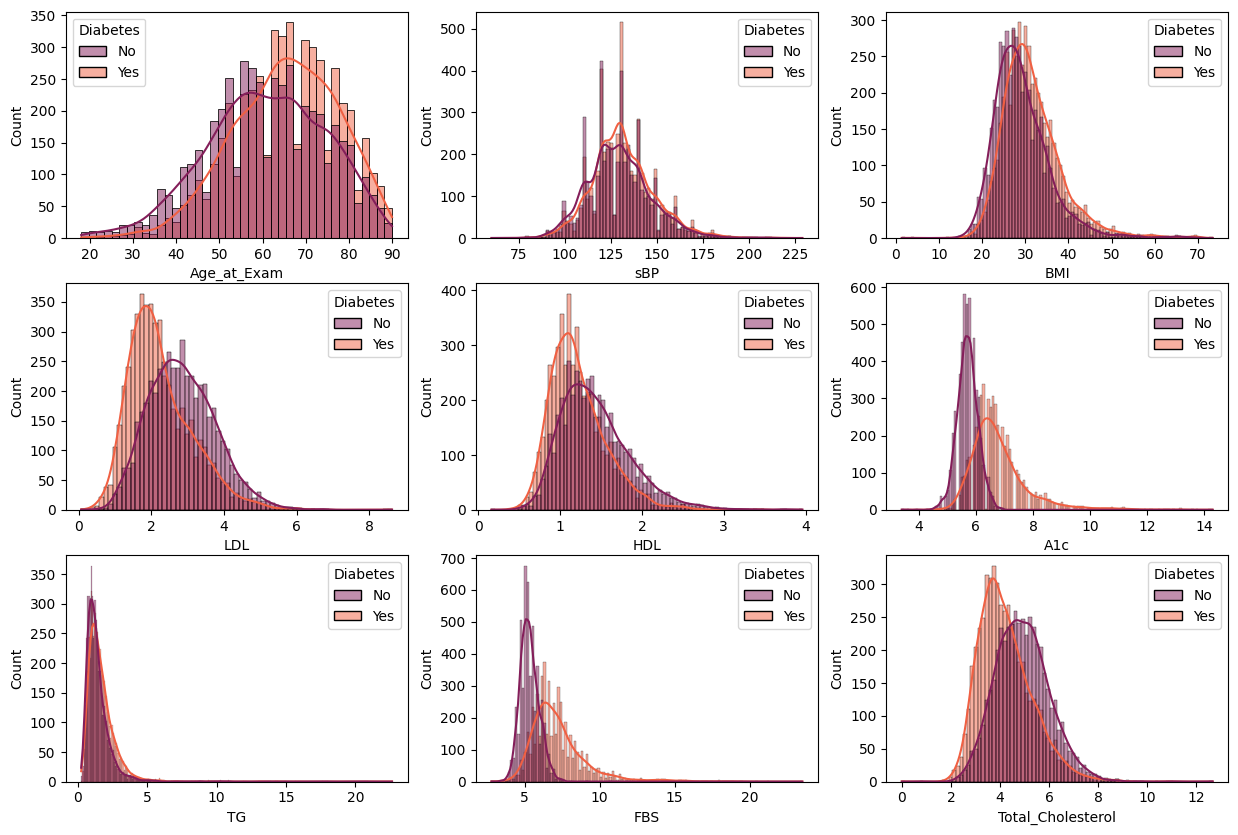

In [85]:
# checking the difference in distribution of numerical features in two classes

# Create a grid of subplots with 2 rows and 3 columns
fig, axs = plt.subplots(ncols=3, nrows=3, figsize=(15, 10))

# Loop over each feature in numerical and multinomial lists
for i, column in enumerate(numerical_columns):
    # Calculate the position for the subplot; x is the row index and y is the column index
    x = i // 3
    y = i % 3

    # Plot a histogram of the feature split by the 'target' class
    # kde=True adds a Kernel Density Estimate plot to smooth the histogram, providing a clearer view of the data distribution
    sns.histplot(data1_dscrpt, x=column, hue= target_column, kde=True, palette='rocket', ax=axs[x][y])

# Display all the subplots
plt.show()

For Diabetics:
- slightly older
- similar sbp
- slightly higher BMI
- lower LDL
- lower HDL
- higher A1c
- similar TG
- higher FBS
- lower cholesterol